<a href="https://colab.research.google.com/github/cordoba-a/modelo_IA/blob/main/Proyecto_M7_corn_or_Maize_Leaf_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**

## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


In [ ]:
# permitir el acceso a drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install livelossplot

In [ ]:
# Importamos las librerias a utilizar.
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Define functions for loading and resizing images
def load_and_resize_image(file_path, target_shape=(128, 128)):
    image = cv2.imread(file_path)
    resized_image = cv2.resize(image, target_shape)
    return resized_image

In [ ]:
# Define the function to load each image class (target) stored by individual directory.
# Each class directory containing their respective images
def load_image_class_by_directory(image_dir):
    # Load and resize images
    image_files = os.listdir(image_dir)
    images = []
    for file in image_files:
        if file.endswith('.jpg') or file.endswith('.JPG'):  # Assuming images are in jpg or JPG format
            image_path = os.path.join(image_dir, file)
            resized_image = load_and_resize_image(image_path)
            images.append(resized_image)

    print(f"Num of images: {len(images)}")
    print(f"Single image shape before flattening: {images[0].shape}")
    return images

In [ ]:
# Display some images
def display_images(images, num_images_to_display = 6):
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 5))
    for i in range(num_images_to_display):
        # Convert the image to a supported depth (e.g., CV_8U) before color conversion
        image = images[i].astype(np.uint8)
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying with matplotlib
        axes[i].axis('off')
    plt.show()

Num of images: 1145
Single image shape before flattening: (128, 128, 3)


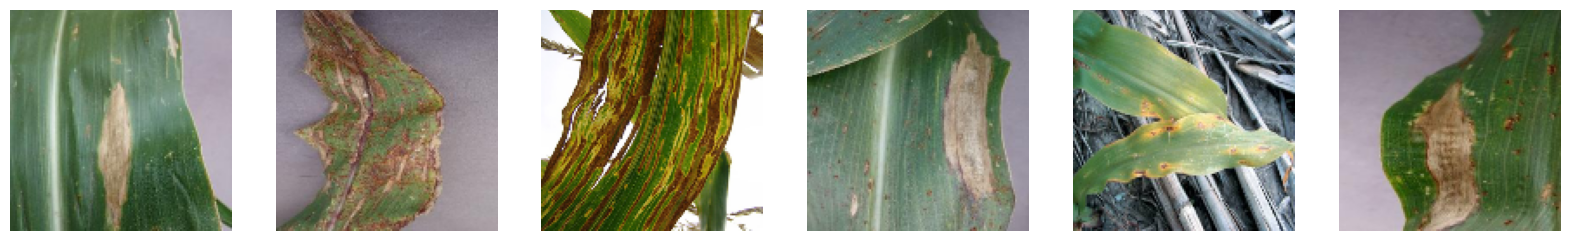

In [ ]:
# Definir el directorio que contiene imágenes.
image_dir = "/content/drive/MyDrive/Colab Notebooks/bootcamp_ciencia_de_datos/M7_Tecnicas_avanzadas_y_empleabilidad/M7_Proyecto/data/Blight"
images_Blight = load_image_class_by_directory(image_dir)
display_images(images_Blight)

Num of images: 1336
Single image shape before flattening: (128, 128, 3)


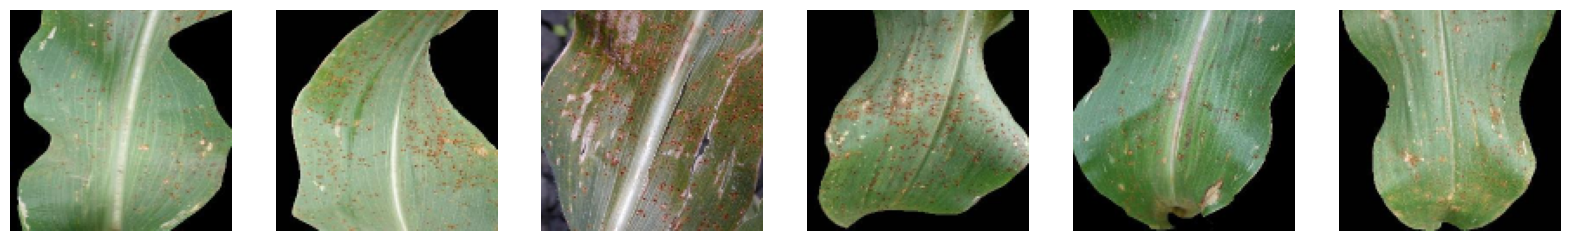

In [ ]:
# Define the directory containing images
image_dir = "/content/drive/MyDrive/Colab Notebooks/bootcamp_ciencia_de_datos/M7_Tecnicas_avanzadas_y_empleabilidad/M7_Proyecto/data/Common_Rust"
images_Common_Rust = load_image_class_by_directory(image_dir)
display_images(images_Common_Rust)

Num of images: 574
Single image shape before flattening: (128, 128, 3)


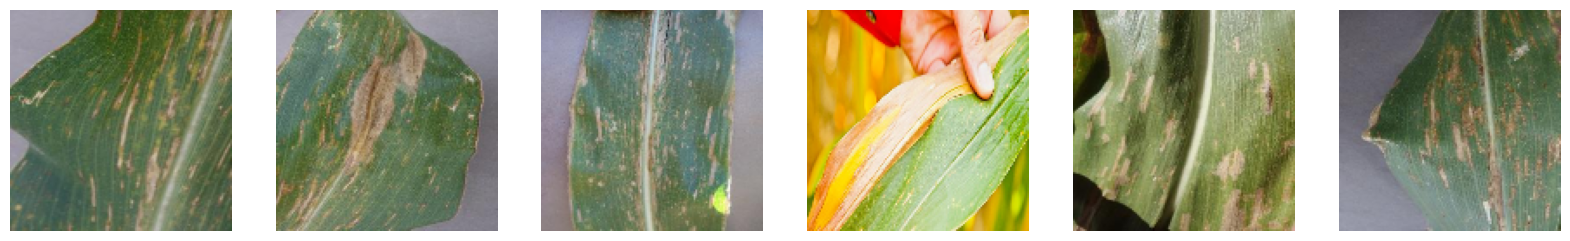

In [ ]:
# Define the directory containing images
image_dir = "/content/drive/MyDrive/Colab Notebooks/bootcamp_ciencia_de_datos/M7_Tecnicas_avanzadas_y_empleabilidad/M7_Proyecto/data/Gray_Leaf_Spot"
images_Gray_Leaf_Spot = load_image_class_by_directory(image_dir)
display_images(images_Gray_Leaf_Spot)

Num of images: 1162
Single image shape before flattening: (128, 128, 3)


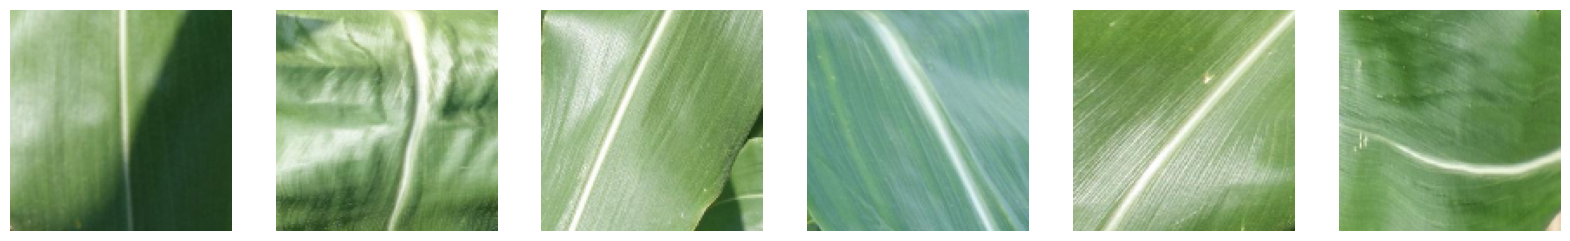

In [ ]:
# Define the directory containing images
image_dir = "/content/drive/MyDrive/Colab Notebooks/bootcamp_ciencia_de_datos/M7_Tecnicas_avanzadas_y_empleabilidad/M7_Proyecto/data/Healthy"
images_Healthy = load_image_class_by_directory(image_dir)
display_images(images_Healthy)

## **Inspecting Samples**

In [ ]:
# Define class labels
classes = {'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}
inverted_classes = {0: 'Blight', 1: 'Common_Rust', 2: 'Gray_Leaf_Spot', 3: 'Healthy'}

images_lst_lst = [images_Blight, images_Common_Rust, images_Gray_Leaf_Spot, images_Healthy]
# Dictionary to store the number of image samples
classes_dict = {}
for i, images in enumerate(images_lst_lst):
    classes_dict.update({inverted_classes[i]: len(images)})
    print(f'Disease: {inverted_classes[i]} --- Images: {len(images)}')

Disease: Blight --- Images: 1145
Disease: Common_Rust --- Images: 1336
Disease: Gray_Leaf_Spot --- Images: 574
Disease: Healthy --- Images: 1162


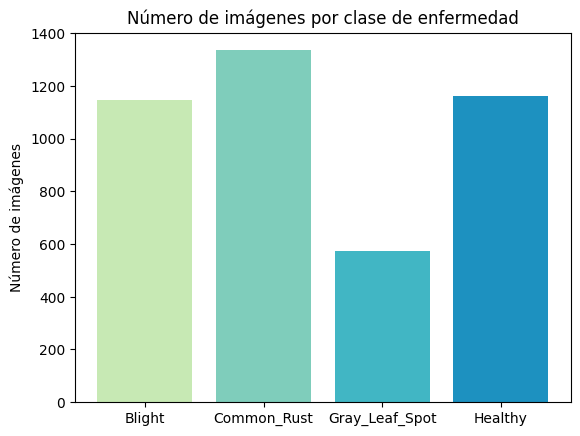

In [ ]:
# Ahora, graficar las clases.
plt.bar(*zip(*classes_dict.items()))
plt.bar(classes_dict.keys(), classes_dict.values(), color=['#c7e9b4', '#7fcdbb', '#41b6c4', '#1d91c0'])
plt.ylabel('Número de imágenes')  # etiqueta del eje y
plt.title('Número de imágenes por clase de enfermedad')  # título del gráfico
plt.show()

The number of samples per class seem pretty uniform, thus the model should have equal chance of being able to identify each of them.

## **Assigning Class Labels**

Pick the number of images to set aside as test set. The algorithm should not see this data as it will be used for later evaluations.

Add a class label for each image. This is done by first flattening the image from 2D to 1D, and then appending the class number to it (such as 0 for Blight, etc.)

In [ ]:
# Function to flatten the RGB values from 2D to 1D, returns a numpy array
def flatten_images(images):
    data_flattened = []
    for image in images:
        flattened_image = image.reshape(-1)  # Flatten the image
        data_flattened.append(flattened_image)


    print(f"Num of images: {len(data_flattened)}")
    print(f"Single image shape after flattening: {data_flattened[0].shape}")

    # Convert data to numpy array for further processing
    data_flattened = np.array(data_flattened)
    return data_flattened

In [ ]:
# Function to assign class labels: returns a numpy array
def assign_image_class_label(images, class_label = int):
    data_labeled = []
    # Flatten the images
    data_flattened = flatten_images(images)

    for image in data_flattened:
        # Assign class label
        data_labeled.append(np.concatenate([image, [class_label]]))

    print(f"Num of images: {len(data_labeled)}")
    print(f"Single data shape with label: {data_labeled[0].shape} --- Class label: {class_label}\n")

    # Convert data to numpy array for further processing
    data_labeled = np.array(data_labeled)
    return data_labeled

In [ ]:
# Function to concatenate the arrays into a pandas dataframe, horizontally
def concat_arrays_to_dataframe(arrays = []):
    # Combine to a single dataframe, vertically
    dataset = np.concatenate(arrays, axis = 0)

    # Number of pixel columns, excluding the last label column
    num_pix = dataset.shape[1] - 1

    # Modify the column names
    col_lst = [f"pixel{col}" for col in range(num_pix)]
    # Append the name of the last column as label
    col_lst.append("label")

    # Convert to a dataframe and add column names
    df_dataset = pd.DataFrame(dataset, columns = col_lst)

    return df_dataset

In [ ]:
# Split the image files into train - test set.
def split_train_test_files(images_lst_lst = [], num_test_set = int):
    train_images_lst_lst = []
    test_images_lst_lst = []
    # Iterate through the first class of images
    for images in images_lst_lst:
        train_set = images[num_test_set:]
        test_set = images[:num_test_set]

        train_images_lst_lst.append(train_set)
        test_images_lst_lst.append(test_set)

    return train_images_lst_lst, test_images_lst_lst

In [ ]:
# Number of images to set aside as test set per class
num_test_set = 10

# Split the image files into train - test set.
train_images, test_images = split_train_test_files(images_lst_lst, num_test_set)

In [ ]:
images_lst_array = []
# Iterate through the classes, the class index i will represent the class name/label
for i, images in enumerate(train_images):
    # Assign label to each of the images
    labeled = assign_image_class_label(images, i)
    images_lst_array.append(labeled)

Num of images: 1135
Single image shape after flattening: (49152,)
Num of images: 1135
Single data shape with label: (49153,) --- Class label: 0

Num of images: 1326
Single image shape after flattening: (49152,)
Num of images: 1326
Single data shape with label: (49153,) --- Class label: 1

Num of images: 564
Single image shape after flattening: (49152,)
Num of images: 564
Single data shape with label: (49153,) --- Class label: 2

Num of images: 1152
Single image shape after flattening: (49152,)
Num of images: 1152
Single data shape with label: (49153,) --- Class label: 3



In [ ]:
# Concatenate arrays to dataframe
df_images = concat_arrays_to_dataframe(images_lst_array)
df_images.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0     133     119     121     169     155     157     176     162     164   
1      19      98      76      10      96      78      12     113      84   
2     131     115     122     131     115     122     130     114     121   
3      96      92      97      99      95     100      98      94      99   
4     159     147     153     162     150     156     162     150     156   

   pixel9  ...  pixel49143  pixel49144  pixel49145  pixel49146  pixel49147  \
0     175  ...          88          70          87          83          65   
1       2  ...         131         164         137         106         149   
2     130  ...         128         124         130         125         121   
3      95  ...         138         124         128         142         128   
4     159  ...          46          39          54          46          39   

   pixel49148  pixel49149  pixel49150  pixel49151  label  
0          82          80          62          79      0  
1         118         110         139         113      0  
2         127         123         119         125      0  
3         132         147         133         137      0  
4          54          45          38          53      0  

[5 rows x 49153 columns]



## **Train Val Split**

In [ ]:
from sklearn.model_selection import train_test_split
import random

In [ ]:
X_images = df_images.drop("label", axis = 1)
y_images = df_images["label"]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_images, y_images, test_size = 0.10, random_state = 2, shuffle=True)
print("Shape of train X:", X_train.shape)
print("Shape of train Y:", y_train.shape)
print("Shape of val X:", X_val.shape)
print("Shape of val Y:", y_val.shape)

Shape of train X: (3759, 49152)
Shape of train Y: (3759,)
Shape of val X: (418, 49152)
Shape of val Y: (418,)


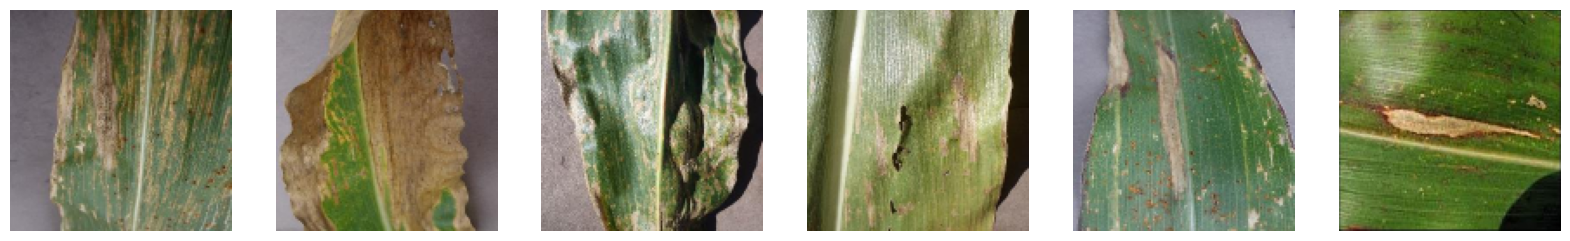

In [ ]:
# Display some images before scaling
X_train_RGB = np.array(X_train).reshape(-1, 128, 128, 3)
display_images(X_train_RGB)

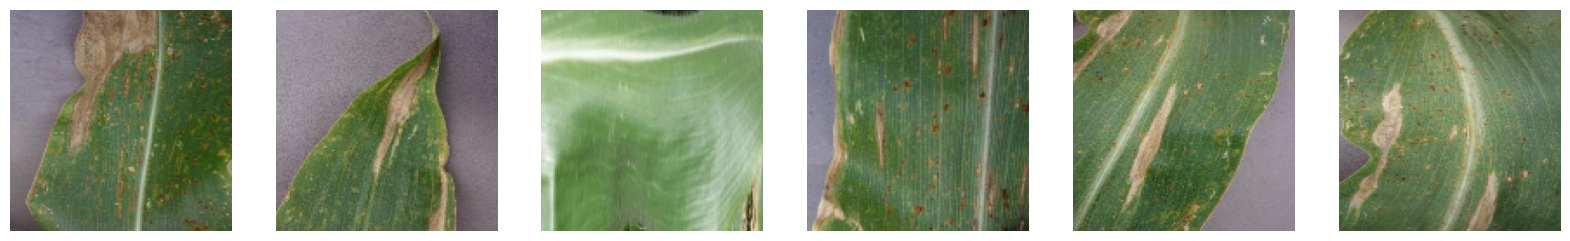

In [ ]:
# Display some images before scaling
X_val_RGB = np.array(X_val).reshape(-1, 128, 128, 3)
display_images(X_val_RGB)

 ## **Normalizing Dataset**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# The pixel values ranges from 0 to 255. The MinMaxScaler makes it from 0 to 1.
# This reduces the magnitude sensitivity of the activation function for the choosen ML algorithm.
scaler = MinMaxScaler(feature_range = (0, 1))

# Convert to numpy array to remove feature names before fitting
scaler = scaler.fit(np.array(X_train))
X_train_np = scaler.transform(np.array(X_train))
X_val_np = scaler.transform(np.array(X_val))

# Reshape to RGB format
X_train_RGB = np.array(X_train_np).reshape(-1, 128, 128, 3)
X_val_RGB = np.array(X_val_np).reshape(-1, 128, 128, 3)

# Reshape targets
y_train = y_train.values.reshape(len(y_train), 1)
y_val = y_val.values.reshape(len(y_val), 1)

In [ ]:
print("Shape of train X:", X_train_RGB.shape)
print("Shape of train Y:", y_train.shape)
print("Shape of val X:", X_val_RGB.shape)
print("Shape of val Y:", y_val.shape)

Shape of train X: (3759, 128, 128, 3)
Shape of train Y: (3759, 1)
Shape of val X: (418, 128, 128, 3)
Shape of val Y: (418, 1)


## **Building Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# To avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping

# Target variable needs one-hot encoding to ensure each example has a probability of 1.0 for its actual class and 0.0 for others.
# Use Keras to_categorical() function for achieving this.
from tensorflow.keras.utils import to_categorical

# Draw live chart of accuracy of neural network
from livelossplot import PlotLossesKeras

In [ ]:
# Forma de una sola imagen
input_shape = X_train_RGB[0].shape
num_train_images = len(X_train_RGB)
# Número de clases a predecir
num_classes = 4
print(f'Forma de imagen única: {input_shape}')
print(f'Número de imágenes de entrenamiento: {num_train_images}')

Single image shape: (128, 128, 3)
Number of train images: 3759


Here comes the model architecture and its components.


In [ ]:
model = Sequential() # Inicializar el modelo secuencial
model.add(Input(shape=input_shape)) # Agregue una capa de entrada con la forma de entrada especificada
model.add(Conv2D(128, (3, 3), activation="relu")) # Agregue una capa convolucional con 128 filtros de tamaño 3x3, usando la función de activación ReLU
model.add(MaxPooling2D((2, 2))) # Agregue una capa de agrupación máxima con un tamaño de filtro de 2x2
model.add(Dropout(0.5)) # Agregue regularización de abandono para omitir neuronas aleatoriamente
model.add(Conv2D(64, (3, 3), activation="relu")) # Agregue otra capa convolucional con 64 filtros de tamaño 3x3, usando la función de activación ReLU
model.add(MaxPooling2D((2, 2))) # Agregue otra capa de agrupación máxima con un tamaño de filtro de 2x2
model.add(Dropout(0.5)) # Agregue regularización de abandono para omitir neuronas aleatoriamente
model.add(Flatten()) # Aplanar la salida de las capas anteriores.
model.add(Dense(256, activation="relu")) # Agregue una capa densa con 256 neuronas y función de activación ReLU
model.add(Dropout(0.5)) # Agregue regularización de abandono para omitir neuronas aleatoriamente
model.add(Dense(num_classes, activation="softmax")) # Agregue una capa de salida densa con la cantidad de clases y la función de activación softmax
opt = SGD(learning_rate=0.0001, momentum=0.9) # Compilar el modelo con pérdida de entropía cruzada categórica y optimizador de descenso de gradiente estocástico
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])


In [ ]:
# Display a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [ ]:
# Initialize Image Augmentation
train_datagen = ImageDataGenerator(rotation_range = 10,  # rotation
                                   width_shift_range = 0.1,  # horizontal shift
                                   height_shift_range = 0.1,
                                   zoom_range = 0.1) # zoom

In [ ]:
# Initialize regularization parameters - how many epochs to wait before training stops, if there is no further improvement
monitor_val_loss = EarlyStopping(monitor = "val_loss",
                                 min_delta = 1e-3,
                                 patience = 1,
                                 verbose = 1,
                                 mode = "auto",
                                 restore_best_weights = True)

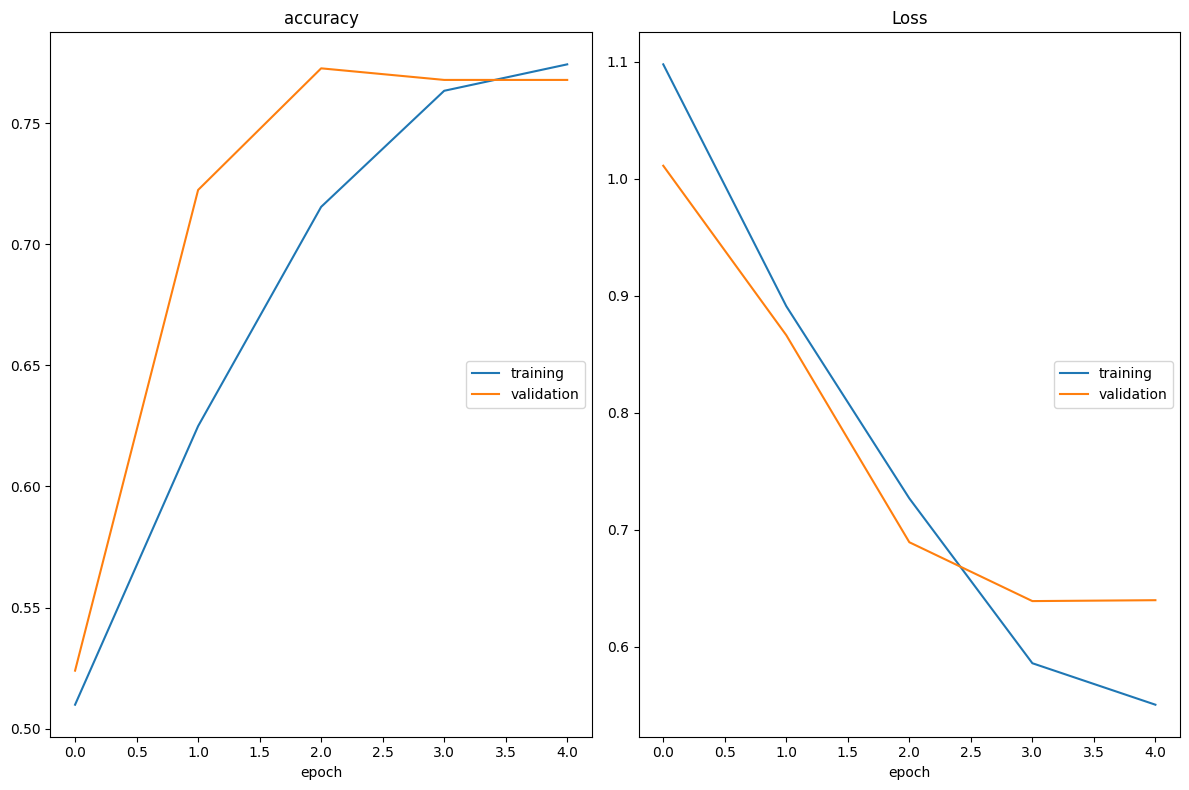

accuracy
	training         	 (min:    0.510, max:    0.774, cur:    0.774)
	validation       	 (min:    0.524, max:    0.773, cur:    0.768)
Loss
	training         	 (min:    0.551, max:    1.098, cur:    0.551)
	validation       	 (min:    0.639, max:    1.011, cur:    0.640)
Restoring model weights from the end of the best epoch: 4.
751/751 [==============================] - 550s 732ms/step - loss: 0.5507 - accuracy: 0.7744 - val_loss: 0.6400 - val_accuracy: 0.7679
Epoch 5: early stopping


In [ ]:
# La variable de destino necesita codificación one-hot para garantizar que cada ejemplo tenga una probabilidad de 1,0 para su clase real y 0,0 para las demás.
# Utilice la función Keras to_categorical() para lograr esto.
epochs = 6
batch_size = 5
# Usando el método de flujo para aumentar la imagen sobre la marcha.
training_data = train_datagen.flow(X_train_RGB, to_categorical(y_train), batch_size = batch_size)
# Evaluación del modelo
validation_data = (X_val_RGB, to_categorical(y_val))

history = model.fit(training_data,
                    epochs = epochs,
                    steps_per_epoch = num_train_images // batch_size, # Number of iterations per epoch
                    batch_size = batch_size,
                    validation_data = validation_data,
                    callbacks = [PlotLossesKeras(), monitor_val_loss], #live chart
                    verbose = 1
                   )

In [ ]:
# model.save("/content/drive/MyDrive/Colab Notebooks/bootcamp_ciencia_de_datos/M7_Tecnicas_avanzadas_y_empleabilidad/M7_Proyecto/data")

## **Evaluating Model**

Recall that first n images haven't been seen by the algorithm.

In [ ]:
# Function to scale and reshape the images for each class
def scale_and_reshape_images(flattened_images_lst = []):
    images_scaled_RGB_lst = []
    for images in flattened_images_lst:
        # Scale images using same scaller used for the train and val set
        images_scaled = scaler.transform(images)
        # Reshape to RGB format
        images_scaled_RGB = np.array(images_scaled).reshape(-1, 128, 128, 3)

        images_scaled_RGB_lst.append(images_scaled_RGB)
    return images_scaled_RGB_lst

In [ ]:
# Display a single image
def display_image(image_single):
    image_flat = image_single.reshape(1, -1) # Flatten image
    image_inv = scaler.inverse_transform(image_flat) # Inverse transform image
    image_reshaped = image_inv.reshape(128, 128, 3)

    image = image_reshaped.astype(np.uint8)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
# Interprete model prediction: returns the predicted class and the confidence level in %
def interpret_model_prediction(predictions):
    # Convert inferences to list and
    pred_lst = predictions[0,:].tolist()
    # Get the max value
    max_proba = max(pred_lst)
    # Get the index position of the max_probability
    pred_idx = pred_lst.index(max_proba)

    return pred_idx, max_proba

In [ ]:
# Define the function to make the inferences/predictions.
# Takes the actual value (String) and the image index (int from 0 to n, where n is the num_test_set)
def make_predictions(scaled_RGB_lst, image_class = '', image_idx = int):
    # Get the numerical value of the class form the defined classes dictionary
    class_val = classes[image_class]

    # Get the single image
    image_single = scaled_RGB_lst[class_val][image_idx]

    # Make prediction for one image. Has to be reshaped
    pred = model.predict(image_single.reshape(1, 128, 128, 3))

    # Interpret model predictions
    pred_class, confidence = interpret_model_prediction(pred)

    # Display image
    display_image(image_single)

    print(f"Actual: {image_class}")
    print(f"Predicted: {list(classes.keys())[pred_class]}")
    print(f'Confidence: {round(confidence, 4)}')

In [ ]:
# Flatten the images
images_lst_array = []
for images in test_images:
    # Function returns two values
    flattened = flatten_images(images) # num_test_set is the number of images set aside as test set

    images_lst_array.append(flattened)

Num of images: 10
Single image shape after flattening: (49152,)
Num of images: 10
Single image shape after flattening: (49152,)
Num of images: 10
Single image shape after flattening: (49152,)
Num of images: 10
Single image shape after flattening: (49152,)


In [ ]:
# Normalize and reshape the images for each class
images_scaled_RGB_lst = scale_and_reshape_images(images_lst_array)

1/1 [==============================] - 0s 145ms/step


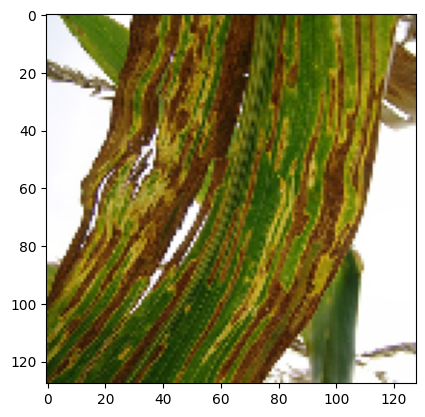

Actual: Blight
Predicted: Blight
Confidence: 0.6526
1/1 [==============================] - 0s 81ms/step


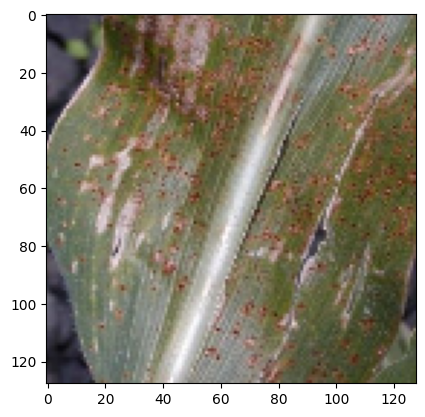

Actual: Common_Rust
Predicted: Blight
Confidence: 0.4094
1/1 [==============================] - 0s 49ms/step


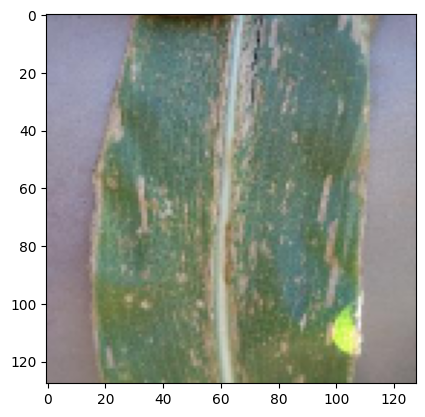

Actual: Gray_Leaf_Spot
Predicted: Blight
Confidence: 0.4996
1/1 [==============================] - 0s 59ms/step


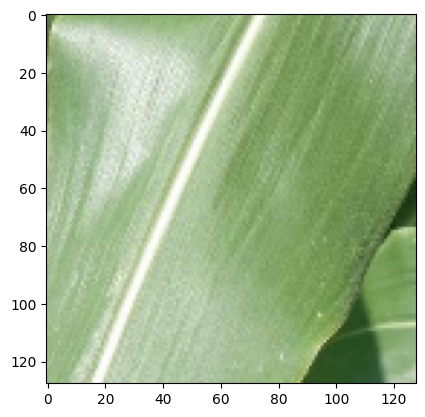

Actual: Healthy
Predicted: Healthy
Confidence: 0.9579


In [ ]:
# Keys from the classes dictionary defined above
class_keys = list(classes.keys())
# Image index from the test set
image_idx = 2
for key in class_keys:
    make_predictions(images_scaled_RGB_lst, key, image_idx)